<center><img src="https://i.postimg.cc/ydZcb9cY/Hello.jpg">

<a id=1></a>
# <p style="padding:10px; margin:0;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 30px 10px;overflow:hidden;font-weight:700;background-color:#003285; color:#e3f6f5">playing-cards-object-detection-yolov8

<center><img src='https://i.postimg.cc/VvY0yrrg/559296.jpg'>

<a id="0"></a>
<div style="border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);border:2px solid #90e0ef; padding: 20px">  
    
### **[1. About this Notebook](#1)**
   - [1.1 About Dataset](#11)
   - [1.2 Import Libraries](#12)
   
### **[2. Setups](#2)**
   - [2.1 Install Lobraries](#21)
   - [2.2 Import Libraries](#22)
 
 
### **[3. Load Data](#3)**  
   - [3.1 | Folder Define](#31)
   - [3.2 | Number of Images and Classes](#32)
   - [3.3 | Image Size](#33)
   - [3.4 | Show Images](#34)

### **[4. Model](#4)**
   - [4.1 | Define and Train the Model](#41)
   - [4.2 | Validation of the Model](#42)
   - [4.3 | Prediction](#43)

    
### **[5. Author](#author)**

<a id=1></a>
# <p style="padding:10px; margin:0;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 30px 10px;overflow:hidden;font-weight:700;background-color:#003285; color:#e3f6f5">1. About this Notebook

<a id=1.1></a>
### <span style="padding:10px; margin:0;font-family:newtimeroman;font-size:100%;text-align:left;border-radius: 15px 15px;overflow:hidden;font-weight:700;background-color:#2A629A; color:#e3f6f5">1.1 | About Dataset

<div style="background-color:#dce9f5; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);border:2px solid #0A2342">
    <h5 style="font-size:25px; font-family:calibri; color:#0A2342;"><b>Context</b></h5>
    <p style="font-size:18px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">
Highly inspired by RAIN MAN 2.0 by Edje Electronics (https://www.youtube.com/watch?v=Nf3zBJ2cDAs) I wanted to create my own playing cards AI for Blackjack and Poker. I didn't have much prior experience to DL so I wanted to jump in straight away and train my own yolov5 model but there was no dataset provided, only the code for generating it.

<div style="background-color:#dce9f5; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);border:2px solid #0A2342">
    <h5 style="font-size:25px; font-family:calibri; color:#0A2342;"><b>Content</b></h5>
    <p style="font-size:18px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">

First I took 20-30 second videos of all 52 cards under variable light temperature and brightness. The images were processed with open-cv. The DTD dataset (https://www.robots.ox.ac.uk/~vgg/data/dtd/) was used to simulate backgrounds of various textures for our dataset.

The original generated dataset was in Pascal VOC format. It was uploaded to Roboflow and exported to YOLO v5 PyTorch format.

Images are 416x416, split into train/test/valid (70/20/10 split).

Use kaggle_data.yaml if training in kaggle; data.yaml if training on your local machine

<a id=1.2></a>
### <span style="padding:10px; margin:0;font-family:newtimeroman;font-size:100%;text-align:left;border-radius: 15px 15px;overflow:hidden;font-weight:700;background-color:#2A629A; color:#e3f6f5">1.2 | About Code

<div style="background-color:#dce9f5; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);border:2px solid #0A2342">
    <h5 style="font-size:25px; font-family:calibri; color:#0A2342;"><b>Code</b></h5>
    <p style="font-size:18px; font-family:calibri; line-height: 1.5em; text-indent: 20px;"> In this notebook, I use Python language and using utralytics library as main tool to detect cards and bounding boxes. </br>
    objective of this notebook is to detect cards to use in other applications such as games or a coach to learn playing cards.</br>
    Using my codes are free and allowed to every body.

<a id=2></a>
# <p style="padding:10px; margin:0;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 30px 10px;overflow:hidden;font-weight:700;background-color:#003285; color:#e3f6f5">2. Setup

<a id=21></a>
### <span style="padding:10px; margin:0;font-family:newtimeroman;font-size:100%;text-align:left;border-radius: 15px 15px;overflow:hidden;font-weight:700;background-color:#2A629A; color:#e3f6f5">2.1 | Install Libraries

<div style = 'border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);border:2px solid #90e0ef; background-color:#dce9f5 ;padding:10px; font-size:100%; color:black'>
<p>🔵 First step is Installing python libraries with <code>pip install</code> command. (-q is for quite installing)

In [1]:
! pip install -q ultralytics

<a id=22></a>
### <span style="padding:10px; margin:0;font-family:newtimeroman;font-size:100%;text-align:left;border-radius: 15px 15px;overflow:hidden;font-weight:700;background-color:#2A629A; color:#e3f6f5">2.2 | Import Libraries

<div style = 'border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);border:2px solid #90e0ef; background-color:#dce9f5 ;padding:10px; font-size:100%; color:black'>
<p>🔵 Now, import libraries.

In [2]:
import os
import random
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from tqdm.notebook import tqdm
from termcolor import colored

import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')

<a id=2></a>
# <p style="padding:10px; margin:0;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 30px 10px;overflow:hidden;font-weight:700;background-color:#003285; color:#e3f6f5">3. Load Data

<a id=31></a>
### <span style="padding:10px; margin:0;font-family:newtimeroman;font-size:100%;text-align:left;border-radius: 15px 15px;overflow:hidden;font-weight:700;background-color:#2A629A; color:#e3f6f5">3.1 | Folder Define

<div style = 'border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);border:2px solid #90e0ef; background-color:#dce9f5 ;padding:10px; font-size:100%; color:black'>
<p>🔵 Here, Define important pathes to future uses. They are <b>yaml file, train, test and validation</b> pathes.

In [3]:
# Path of dataset
base_dir = '/kaggle/input/playing-cards-object-detection-dataset'

# Path of yaml file
yaml_path = os.path.join(base_dir, 'data.yaml')

# Path of Train directory
train_dir = os.path.join(base_dir, 'train')
train_images = os.path.join(train_dir, 'images')

# Path of Validation directory
valid_dir = os.path.join(base_dir, 'valid')
valid_images = os.path.join(valid_dir, 'images')

# Path of Test directory
test_dir = os.path.join(base_dir, 'test')
test_images = os.path.join(test_dir, 'images')

<a id=32></a>
### <span style="padding:10px; margin:0;font-family:newtimeroman;font-size:100%;text-align:left;border-radius: 15px 15px;overflow:hidden;font-weight:700;background-color:#2A629A; color:#e3f6f5">3.2 | Number of Images and Classes

<div style = 'border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);border:2px solid #90e0ef; background-color:#dce9f5 ;padding:10px; font-size:100%; color:black'>
<p>🔵 By refering to yaml file, you can find classes of this dataset. define and count them.

In [4]:
# All the classes from yaml file
class_names = ['10c', '10d', '10h', '10s', '2c', '2d', '2h', '2s', '3c', '3d', '3h', '3s', '4c', '4d', '4h', '4s', '5c', '5d', '5h', '5s', '6c', '6d', '6h', '6s', '7c', '7d', '7h', '7s', '8c', '8d', '8h', '8s', '9c', '9d', '9h', '9s', 'Ac', 'Ad', 'Ah', 'As', 'Jc', 'Jd', 'Jh', 'Js', 'Kc', 'Kd', 'Kh', 'Ks', 'Qc', 'Qd', 'Qh', 'Qs']
print(colored(f'Number of Classes : {len(class_names)}', 'green', attrs=['bold']))

Number of Classes : 52


<div style = 'border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);border:2px solid #90e0ef; background-color:#dce9f5 ;padding:10px; font-size:100%; color:black'>
<p>🔵 In this part, count the number of images in each folder.

In [5]:
print(colored(f'Number of Train Images : {len(os.listdir(train_images))}', 'blue', attrs=['bold']))
print(colored(f'Number of Validation Images : {len(os.listdir(valid_images))}', 'blue', attrs=['bold']))
print(colored(f'Number of Test Images : {len(os.listdir(test_images))}', 'blue', attrs=['bold']))

Number of Train Images : 14000
Number of Validation Images : 4000
Number of Test Images : 2000


<a id=33></a>
### <span style="padding:10px; margin:0;font-family:newtimeroman;font-size:100%;text-align:left;border-radius: 15px 15px;overflow:hidden;font-weight:700;background-color:#2A629A; color:#e3f6f5">3.3 | Image Size

<div style = 'border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);border:2px solid #90e0ef; background-color:#dce9f5 ;padding:10px; font-size:100%; color:black'>
<p>🔵 First check all the images, read their sizes and store them in a <b>set</b> variable

In [6]:
# Define a set to store unique sizes
size = set()

# Loop over train images to check image sizes
for img_name in tqdm(os.listdir(train_images)) :
    img_path = os.path.join(train_images, img_name)
    img = cv2.imread(img_path)
    h, w, c = img.shape
    size.add((h, w, c))

if len(size) == 1 :
    print(colored(f'All of images have size of {(w, h, c)}', 'green', attrs=['bold']))
else :
    print(colored(f'There are {len(size)} different image sizes !', 'red', attrs=['bold']))

  0%|          | 0/14000 [00:00<?, ?it/s]

All of images have size of (416, 416, 3)


<div style = 'border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);border:2px solid #90e0ef; background-color:#dce9f5 ;padding:10px; font-size:100%; color:black'>
<p>🔵 As you can see, all the images have a same size.

In [7]:
img_size = (h, w)

<a id=34></a>
### <span style="padding:10px; margin:0;font-family:newtimeroman;font-size:100%;text-align:left;border-radius: 15px 15px;overflow:hidden;font-weight:700;background-color:#2A629A; color:#e3f6f5">3.4 | Show Images

<div style = 'border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);border:2px solid #90e0ef; background-color:#dce9f5 ;padding:10px; font-size:100%; color:black'>
<p>🔵 Define a Dictionary to translate chars like <b>K</b> to <b>KING</b> or <b>s</b> to <b>Spades</b>.

In [8]:
translate_cards = {
    's' : 'Spades',
    'c' : 'Clubs',
    'h' : 'Hearts',
    'd' : 'Diamonds',
    'A' : 'Ace',
    'K' : 'King',
    'Q' : 'Queen',
    'J' : 'Jack'
}


In [9]:
def label_translator(labels) :
    ''' Translate chars to labels '''
    translated_label = ''

    for card in labels :

        if card[0] in ['A', 'K', 'Q', 'J'] :
            c0 = translate_cards[card[0]]
        else :
            if len(card) == 2 :
                c0 = card[0]
            elif len(card) == 3 :
                c0 = card[:2]

        card = c0 + '-' + translate_cards[card[-1]]

        translated_label += card + '\n'
        
    translated_label = translated_label[:-1]
        
    return translated_label

In [10]:
def Draw_Bounding_Boxes(img_name) :
    ''' Show image / Draw boxes / Write class label '''
    img_path = os.path.join(train_images, img_name)
    img_path

    yaml_name = img_name[:-4] + '.txt'
    yaml_path = os.path.join(os.path.join(train_dir, 'labels'), yaml_name)

    title = []

    font = cv2.FONT_HERSHEY_SIMPLEX

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


    f1 = open(yaml_path, "r")
    f2 = open(yaml_path, "r")

    for i in range(len(f1.readlines())) :
        text = f2.readline()

        yaml = text.split()

        class_name = class_names[int(yaml[0])]
        if class_name not in title :
            title.append(class_name)


        x_center = int(float(yaml[1]) * 416)
        y_center = int(float(yaml[2]) * 416)
        w = int(float(yaml[3]) * 416)
        h = int(float(yaml[4]) * 416)

        x1 = x_center - int(w/2)
        y1 = y_center - int(h/2)

        x2 = x_center + int(w/2)
        y2 = y_center + int(h/2)

        # Draw rectangles and text on image
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2, cv2.LINE_AA)
        cv2.rectangle(img, (x1+5, y1-35), (x1+65, y1-5), (255, 255, 255), -1, cv2.LINE_AA)
        cv2.putText(img, class_name, (x1+10, y1-10), font, 1, (0, 0, 255), 2, cv2.LINE_AA)

    title = label_translator(title)
    plt.title(title, fontsize=10, fontweight='bold')
    plt.axis('off')
    plt.imshow(img)

<div style = 'border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);border:2px solid #90e0ef; background-color:#dce9f5 ;padding:10px; font-size:100%; color:black'>
<p>🔵 By using above functions and choose 15 random images of train directory, show images and Bounding Boxes and their labels.

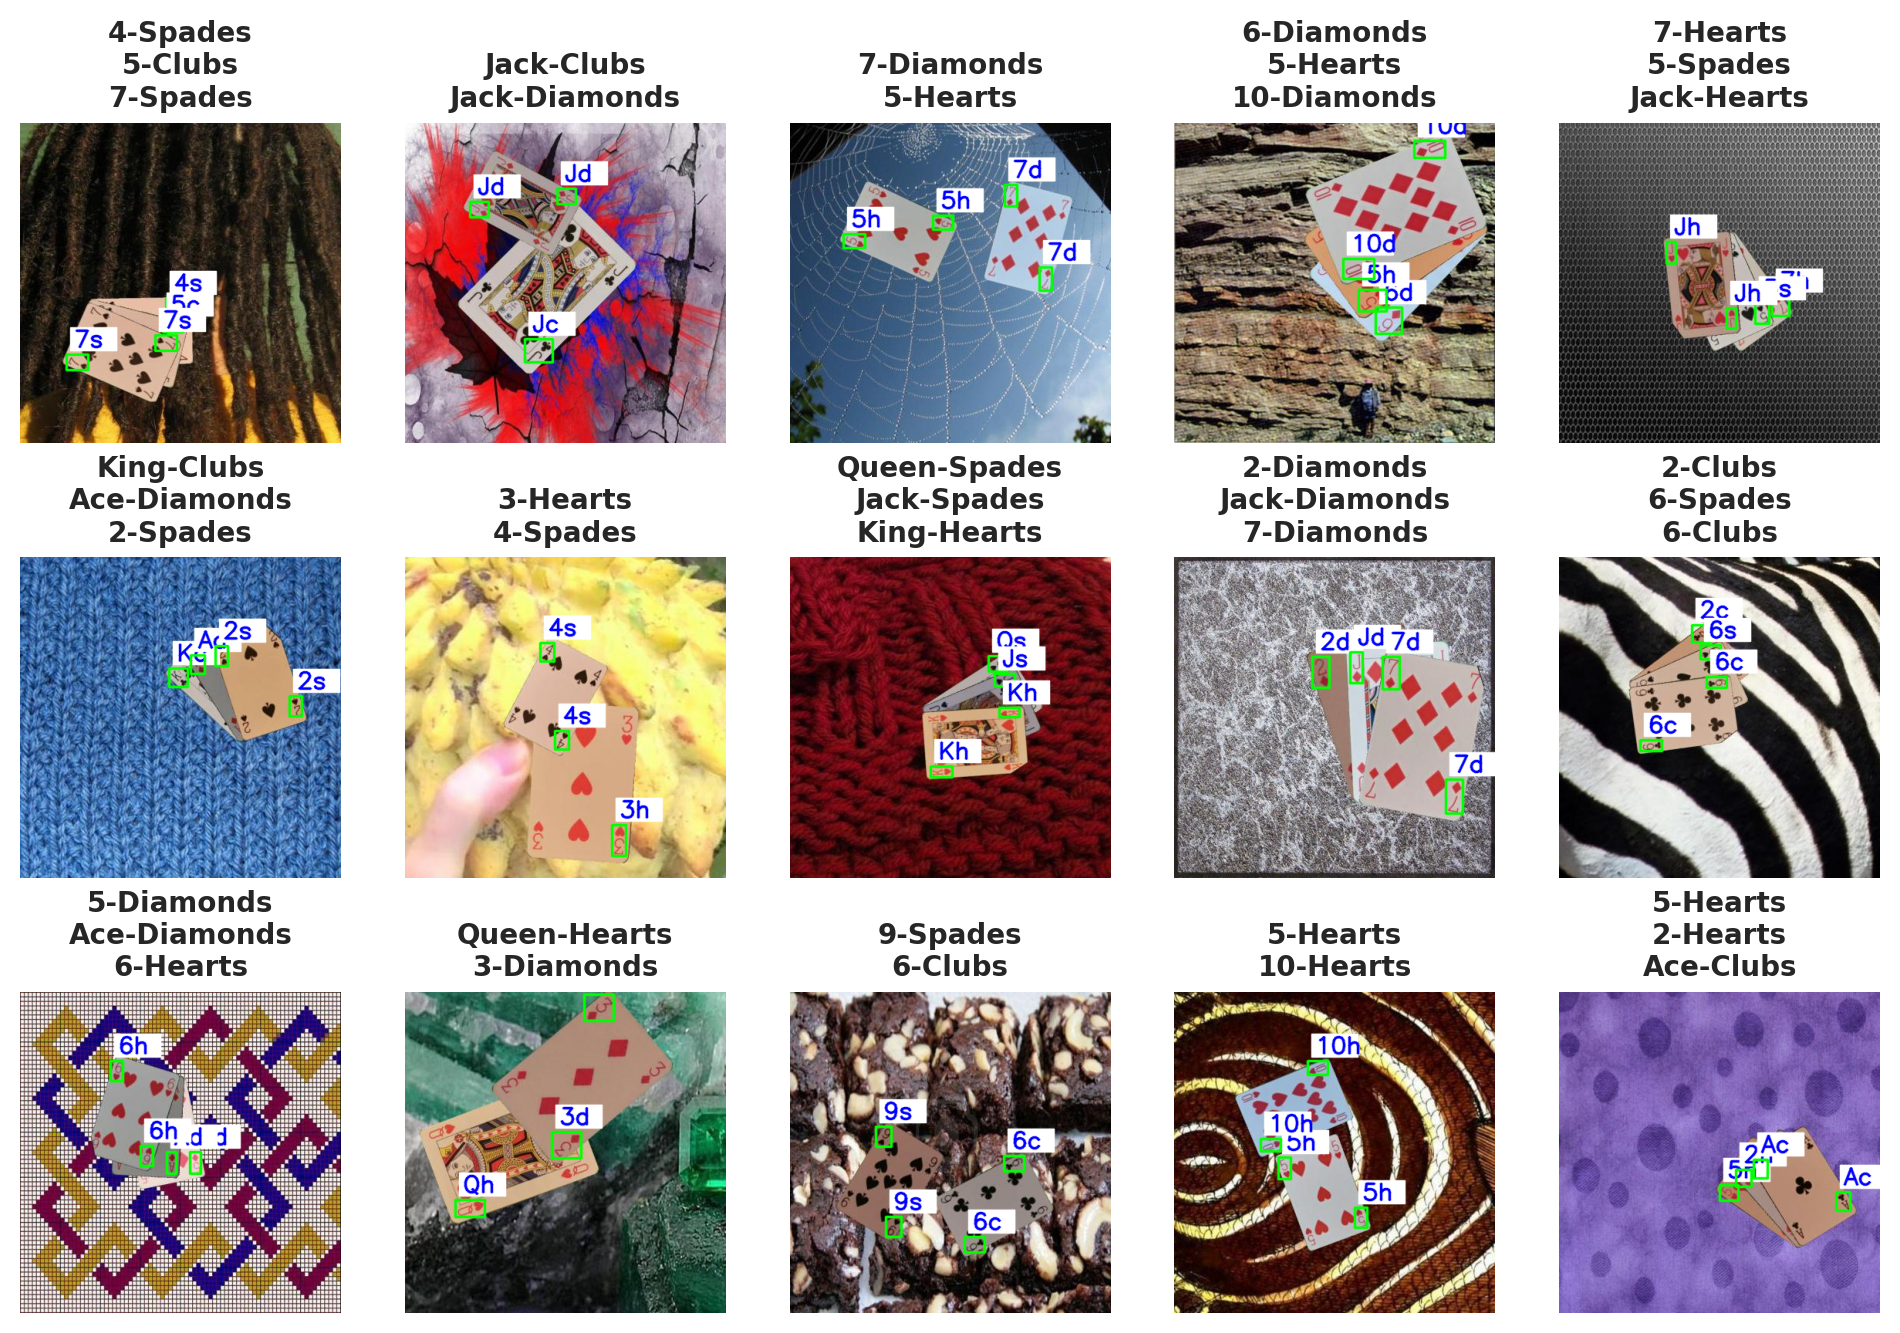

In [11]:
images = os.listdir(train_images)
num_samples = 15

random_images = random.choices(images, k=num_samples)

plt.figure(figsize=(12, 8), dpi=200)
for i in range(15) :
    plt.subplot(3, 5, i+1)
    Draw_Bounding_Boxes(random_images[i])
plt.show()


<a id=4></a>
# <p style="padding:10px; margin:0;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 30px 10px;overflow:hidden;font-weight:700;background-color:#003285; color:#e3f6f5">4. Model

<a id=41></a>
### <span style="padding:10px; margin:0;font-family:newtimeroman;font-size:100%;text-align:left;border-radius: 15px 15px;overflow:hidden;font-weight:700;background-color:#2A629A; color:#e3f6f5">4.1 | Define and Train the Model

<div style = 'border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);border:2px solid #90e0ef; background-color:#dce9f5 ;padding:10px; font-size:100%; color:black'>
<p>🔵 First define a row YOLO model and load pretrained weights on it to reduce training time and increasing accuracy of defined model.</p>
<p>🔵 Then trained the model with yaml file to locate train and validation folder

In [12]:
# Load a row model and load trained weights to it
model = YOLO('yolov8n.yaml').load('yolov8n.pt')

# Train the model
result = model.train(data=yaml_path, epochs=20, imgsz=img_size[0])

Transferred 355/355 items from pretrained weights
Ultralytics YOLOv8.2.58 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/kaggle/input/playing-cards-object-detection-dataset/data.yaml, epochs=4, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=Fa

2024-07-16 13:33:57,980	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-07-16 13:33:58,499	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=52

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

wandb: Currently logged in as: nima-pourmoradi (nima-pourmoradi-freelancer). Use `wandb login --relogin` to force relogin


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/input/playing-cards-object-detection-dataset/train/labels... 14000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14000/14000 [00:18<00:00, 745.65it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/playing-cards-object-detection-dataset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/playing-cards-object-detection-dataset/valid/labels... 4000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4000/4000 [00:05<00:00, 718.34it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/playing-cards-object-detection-dataset/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000179, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train2
Starting training for 4 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/4      2.58G      1.151      4.362     0.9736         79        640: 100%|██████████| 875/875 [03:07<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 125/125 [00:28<00:00,  4.33it/s]


                   all       4000      15159     0.0936      0.222     0.0888     0.0728

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/4      2.57G     0.8034      2.813     0.8705         86        640: 100%|██████████| 875/875 [02:57<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 125/125 [00:28<00:00,  4.36it/s]


                   all       4000      15159      0.347      0.597      0.429      0.367

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/4      2.55G     0.7178      2.145     0.8546         62        640: 100%|██████████| 875/875 [02:54<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 125/125 [00:28<00:00,  4.38it/s]


                   all       4000      15159      0.573      0.712      0.688      0.601

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/4      2.53G     0.6716      1.786     0.8451         93        640: 100%|██████████| 875/875 [02:52<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 125/125 [00:28<00:00,  4.40it/s]


                   all       4000      15159      0.683      0.779      0.787       0.69

4 epochs completed in 0.233 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.58 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv8n summary (fused): 168 layers, 3,015,788 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 125/125 [00:36<00:00,  3.45it/s]


                   all       4000      15159      0.683       0.78      0.787       0.69
                   10c        180        282      0.642      0.853      0.806      0.676
                   10d        188        290      0.687      0.841      0.817      0.678
                   10h        201        322      0.665      0.759      0.723      0.597
                   10s        165        250      0.751      0.892      0.888       0.74
                    2c        193        295      0.748      0.868      0.878      0.786
                    2d        167        259      0.724      0.753      0.803      0.714
                    2h        187        294      0.753      0.872        0.9      0.803
                    2s        192        299      0.845       0.88      0.924      0.815
                    3c        201        308      0.604      0.982       0.92      0.823
                    3d        167        250      0.539      0.844      0.738      0.651
                    3

<div style = 'border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);border:2px solid #90e0ef; background-color:#dce9f5 ;padding:10px; font-size:100%; color:black'>
<p>🔵 Training is finished and result stored in result variabel.</p>
<p>🔵 Plot some of metrics plots on training that generated by YOLO.

In [13]:
# Location of stored result
result_path = result.save_dir

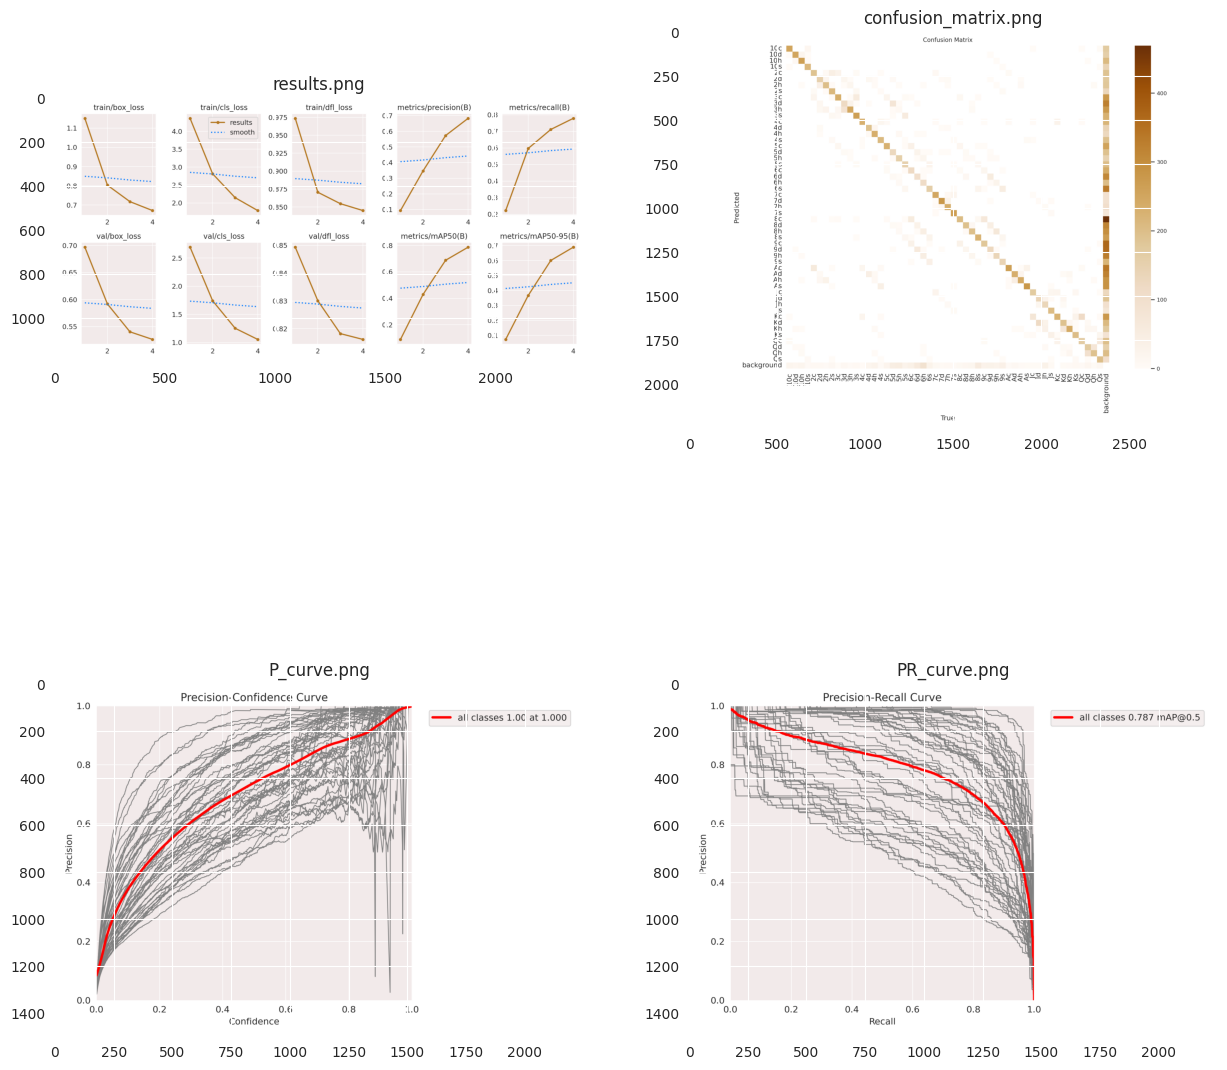

In [14]:
# List of some metrics
metrics = ['results.png','confusion_matrix.png', 'P_curve.png', 'PR_curve.png']

plt.figure(figsize=(15, 12))
i = 1

for image_name in metrics:
    image_path = os.path.join(result_path, image_name)
    image = cv2.imread(image_path)
    
    plt.subplot(2, 2, i)
    
    plt.imshow(image)
    plt.title(image_name)
    i += 1

plt.show()

<div style = 'border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);border:2px solid #90e0ef; background-color:#dce9f5 ;padding:10px; font-size:100%; color:black'>
<p>🔵 There is a csv file that stored useful information on training. Read and plot the data.

In [15]:
# Read csv of result
df = pd.read_csv(os.path.join(result_path, 'results.csv'))
df.tail(5)

epoch        train/box_loss        train/cls_loss  \
0                     1               1.15070                4.3622   
1                     2               0.80339                2.8128   
2                     3               0.71781                2.1454   
3                     4               0.67158                1.7864   

         train/dfl_loss  metrics/precision(B)     metrics/recall(B)  \
0               0.97361               0.09359               0.22188   
1               0.87055               0.34682               0.59709   
2               0.85464               0.57260               0.71191   
3               0.84506               0.68259               0.77919   

       metrics/mAP50(B)   metrics/mAP50-95(B)          val/box_loss  \
0               0.08876               0.07279               0.69690   
1               0.42900               0.36719               0.59183   
2               0.68787               0.60123               0.54026   
3               0.78704               0.69017               0.52624   

           val/cls_loss          val/dfl_loss                lr/pg0  \
0                2.6927               0.84935              0.000060   
1                1.7413               0.83008              0.000090   
2                1.2521               0.81824              0.000090   
3                1.0546               0.81616              0.000046   

                 lr/pg1                lr/pg2  
0              0.000060              0.000060  
1              0.000090              0.000090  
2              0.000090              0.000090  
3              0.000046              0.000046

In [16]:
# Strip columns
df.columns = df.columns.str.strip()
df.columns

Index(['epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')

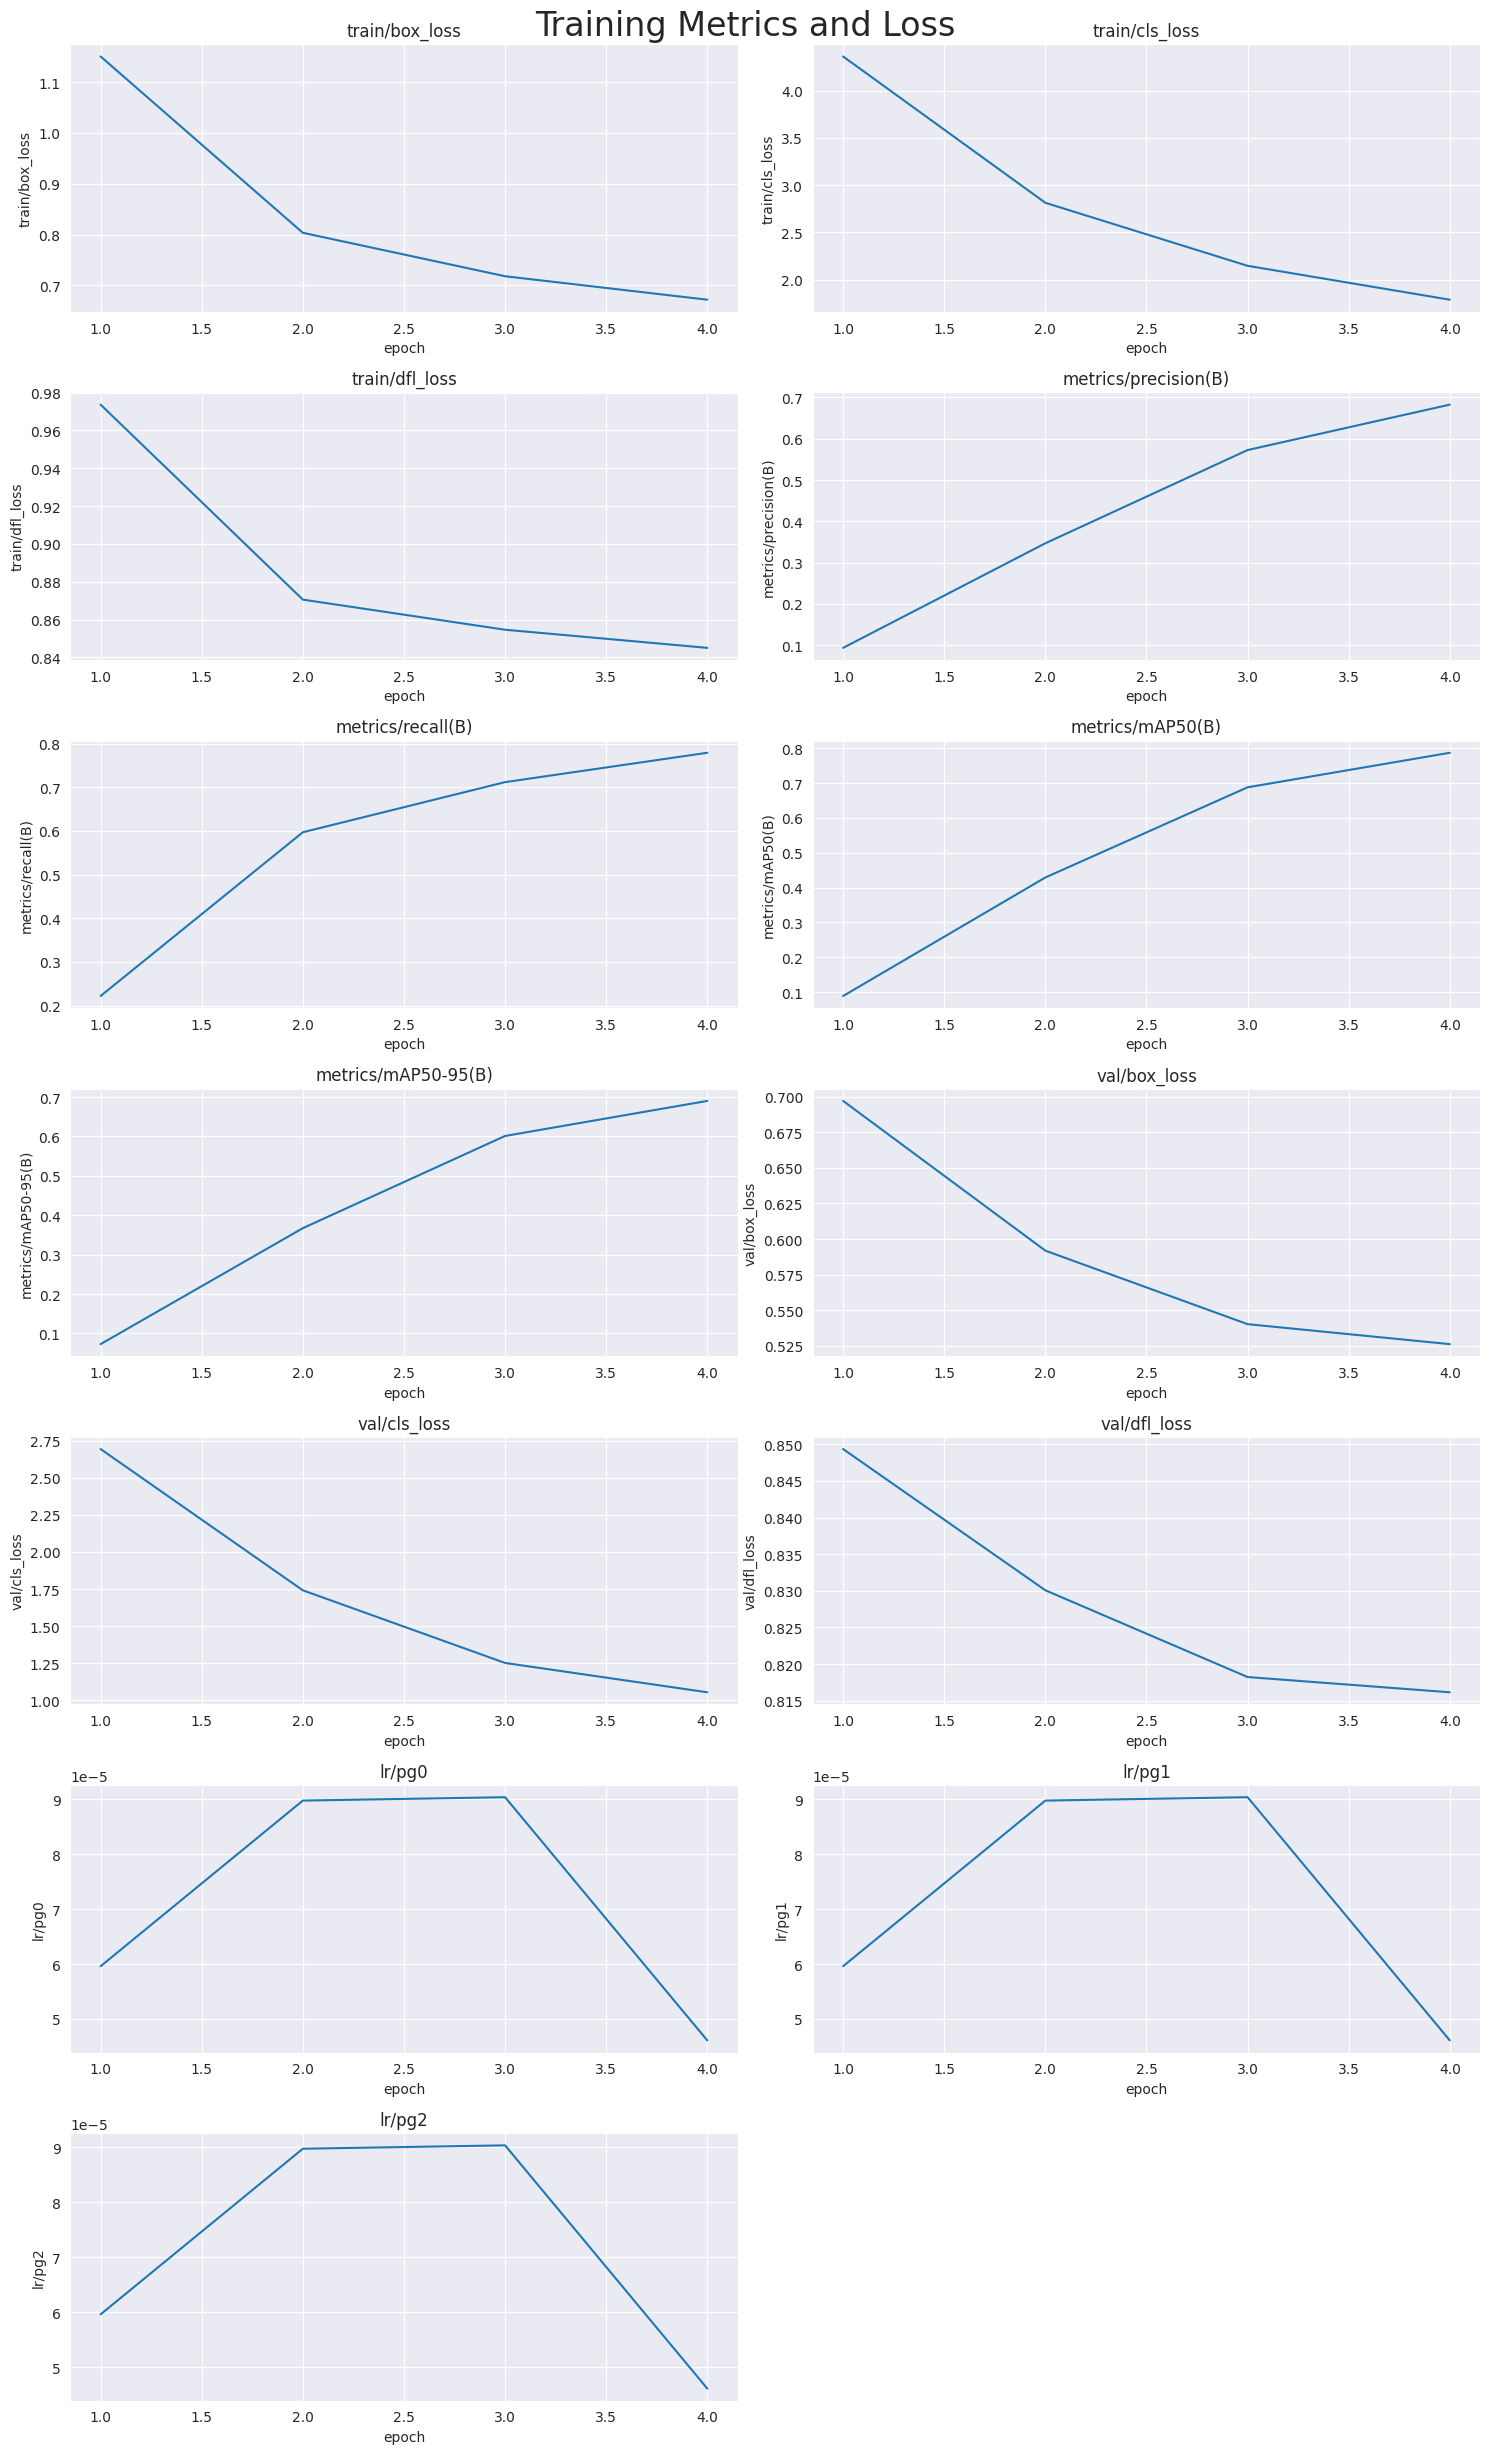

In [17]:
# Define X, y to plot
X = df.epoch
cols = df.columns[1:]

plt.figure(figsize=(15, 25))

for it in range(len(cols)) :
    plt.subplot(7, 2, it+1)
    ax = sns.lineplot(data=df, x=X, y=cols[it])
    ax.set_title(cols[it])
plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.6)
plt.tight_layout()
plt.show()

<a id=42></a>
### <span style="padding:10px; margin:0;font-family:newtimeroman;font-size:100%;text-align:left;border-radius: 15px 15px;overflow:hidden;font-weight:700;background-color:#2A629A; color:#e3f6f5">4.2 | Validation of the Model

<div style = 'border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);border:2px solid #90e0ef; background-color:#dce9f5 ;padding:10px; font-size:100%; color:black'>
<p>🔵 Check the model

In [19]:
# Load model with best weights
best_model_path = os.path.join(result_path, 'weights/best.pt')

best_model = YOLO(best_model_path)

In [20]:
# Evaluating the model
result_test = best_model.val()

Ultralytics YOLOv8.2.58 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv8n summary (fused): 168 layers, 3,015,788 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/playing-cards-object-detection-dataset/valid/labels... 4000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4000/4000 [00:05<00:00, 724.27it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/playing-cards-object-detection-dataset/valid is not writeable, cache not saved.


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:38<00:00,  6.42it/s]


                   all       4000      15159      0.682       0.78      0.787      0.692
                   10c        180        282      0.642      0.855      0.806      0.676
                   10d        188        290      0.688      0.841      0.816      0.678
                   10h        201        322      0.664      0.755      0.724      0.599
                   10s        165        250       0.75      0.892      0.888      0.741
                    2c        193        295      0.748      0.866      0.877      0.788
                    2d        167        259      0.723      0.756      0.803      0.715
                    2h        187        294      0.753      0.872        0.9      0.806
                    2s        192        299      0.845       0.88      0.923      0.817
                    3c        201        308      0.604      0.984       0.92      0.827
                    3d        167        250      0.538      0.848      0.737      0.651
                    3

In [21]:
result_test

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b40112681c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.03303

In [22]:
keys = ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']

for key in keys :
    print(colored(f'{key} : {result_test.results_dict[key]}', 'green', attrs=['bold']))

metrics/precision(B) : 0.6820225867184266
metrics/recall(B) : 0.7799986064153624
metrics/mAP50(B) : 0.7870658574123829
metrics/mAP50-95(B) : 0.6917883721393724


<a id=43></a>
### <span style="padding:10px; margin:0;font-family:newtimeroman;font-size:100%;text-align:left;border-radius: 15px 15px;overflow:hidden;font-weight:700;background-color:#2A629A; color:#e3f6f5">4.3 | Prediction

<div style = 'border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);border:2px solid #90e0ef; background-color:#dce9f5 ;padding:10px; font-size:100%; color:black'>
<p>🔵 Read some of test images and predict their labels by the model, then show them.

In [24]:
images = os.listdir(test_images)
num_samples = 12

random_images = random.choices(images, k=num_samples)

images = []
for image in random_images :
    image_path = os.path.join(test_images, image)
    images.append(image_path)

images

['/kaggle/input/playing-cards-object-detection-dataset/test/images/872298394_jpg.rf.550a278c71fde3591fb33e26e8d018d6.jpg',
 '/kaggle/input/playing-cards-object-detection-dataset/test/images/135946953_jpg.rf.6dd28e6e812c22fe87d6b2da4437da4b.jpg',
 '/kaggle/input/playing-cards-object-detection-dataset/test/images/564845451_jpg.rf.c4553ed2dedfced2b8606d1e7c444a06.jpg',
 '/kaggle/input/playing-cards-object-detection-dataset/test/images/393226725_jpg.rf.3dec61260b0120f7f56b81bc03930aa7.jpg',
 '/kaggle/input/playing-cards-object-detection-dataset/test/images/812503149_jpg.rf.deeabfabeb84075bcc125d6966e7c7b4.jpg',
 '/kaggle/input/playing-cards-object-detection-dataset/test/images/380694722_jpg.rf.af1700dcd6c32a82a3a3b1adaa0b1bc9.jpg',
 '/kaggle/input/playing-cards-object-detection-dataset/test/images/927213788_jpg.rf.db45b546dda05b5e9df28a2caa66a05e.jpg',
 '/kaggle/input/playing-cards-object-detection-dataset/test/images/054627406_jpg.rf.bd0cd51f4990a1c5425f2fd428749e41.jpg',
 '/kaggle/input/

In [25]:
for image in images :
    result = best_model.predict([image], save=True, conf=0.5, iou=0.7)


0: 640x640 1 5c, 1 5h, 8.8ms
Speed: 3.3ms preprocess, 8.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2

0: 640x640 2 4ss, 7.8ms
Speed: 2.6ms preprocess, 7.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2

0: 640x640 1 3d, 1 4c, 1 5d, 1 Ad, 2 Ahs, 8.1ms
Speed: 2.6ms preprocess, 8.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2

0: 640x640 2 Qcs, 7.6ms
Speed: 2.5ms preprocess, 7.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2

0: 640x640 2 8hs, 1 Jh, 8.3ms
Speed: 2.5ms preprocess, 8.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2

0: 640x640 1 5s, 2 8ds, 7.6ms
Speed: 2.6ms preprocess, 7.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2

0: 6

In [26]:
# Location of saved predicted images
result_path = result[0].save_dir
print(result_path)

runs/detect/predict2


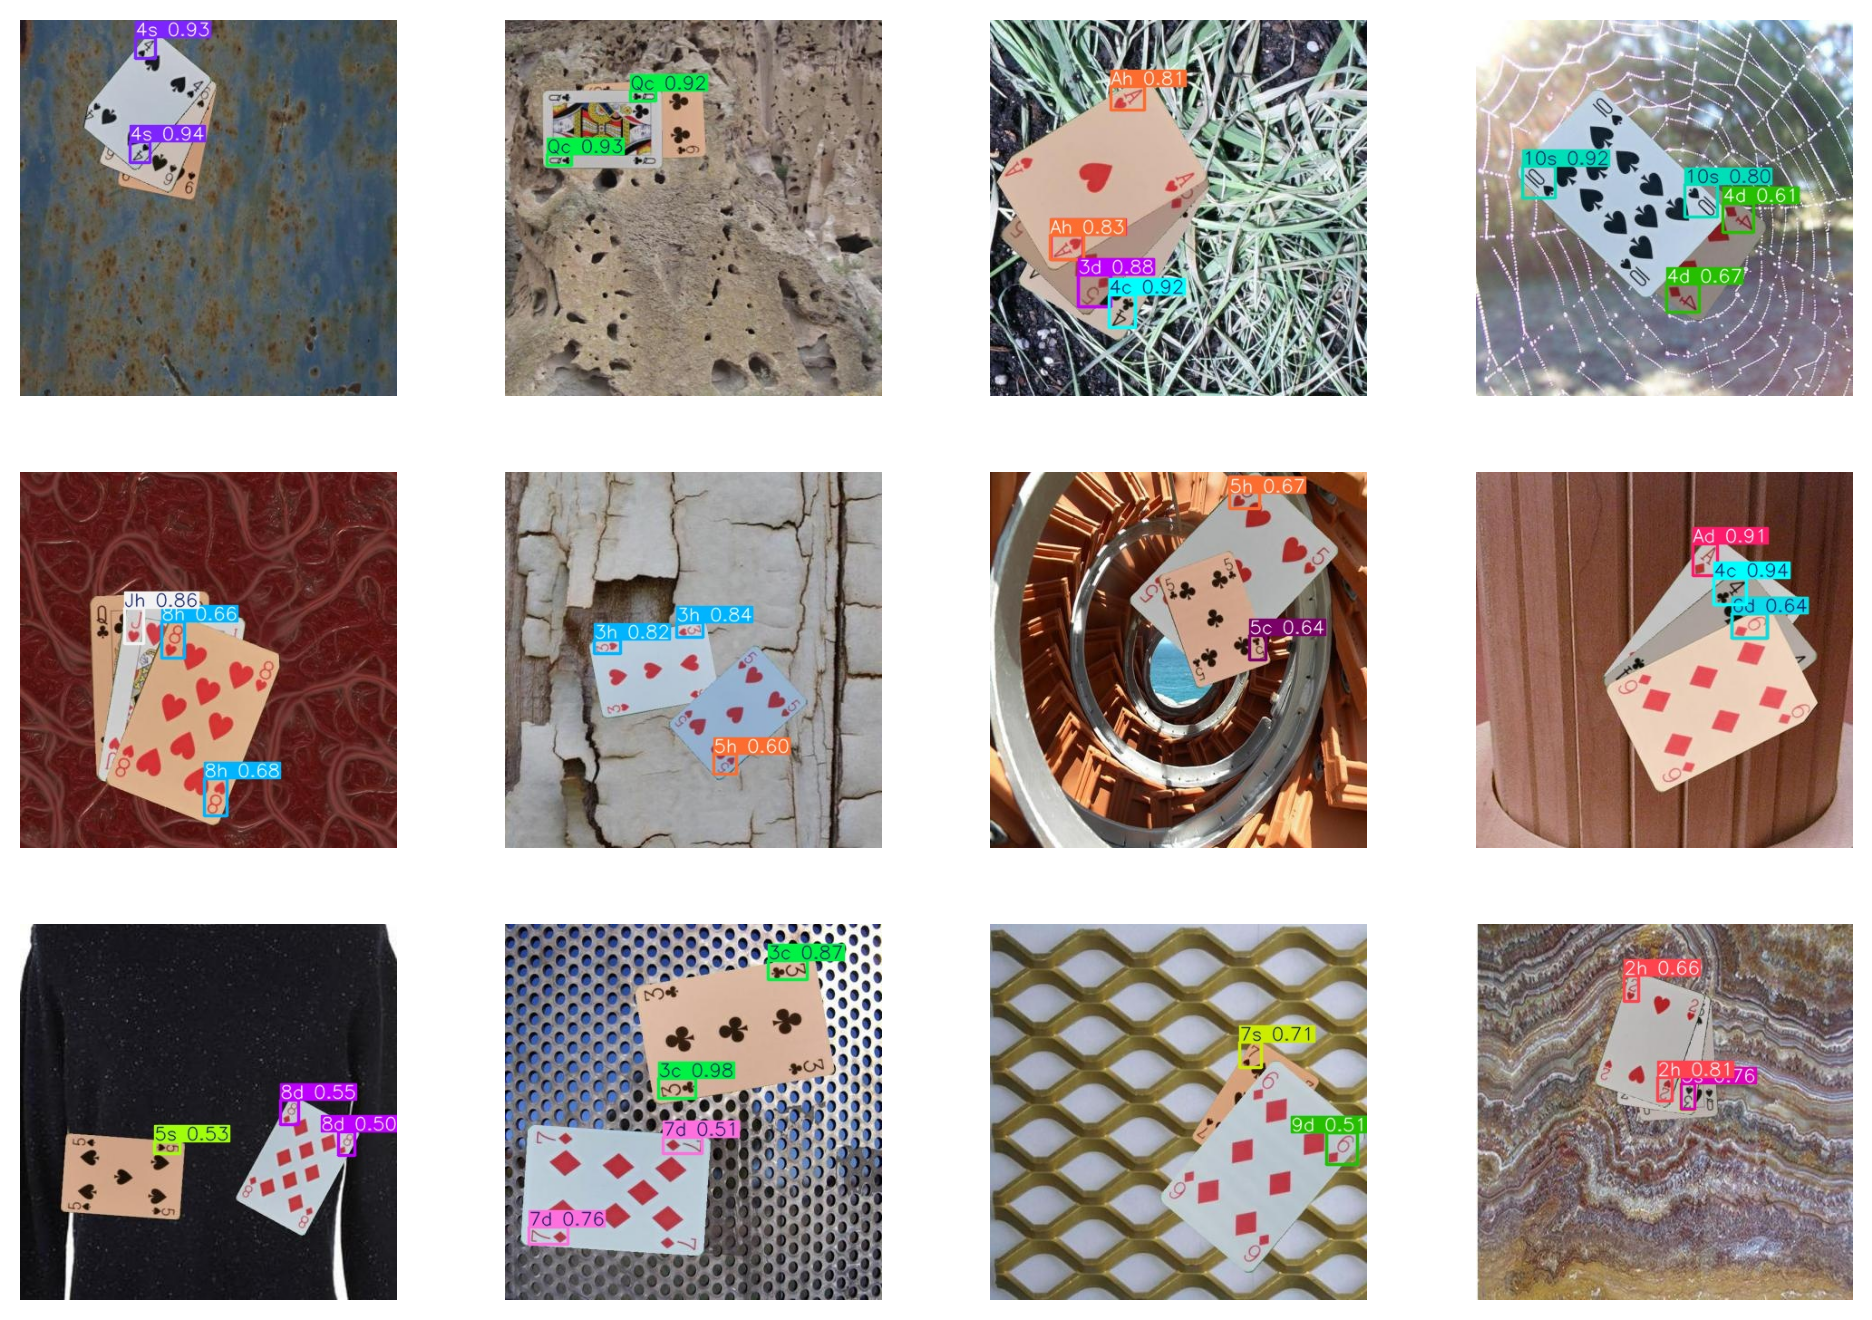

In [27]:
# Show images
i = 1
plt.figure(figsize=(12, 10), dpi=200)
for image in os.listdir(result_path) :
    image_path = os.path.join(result_path, image)
    plt.subplot(3, 4, i)
    plt.imshow(plt.imread(image_path))
    plt.axis('off')
    plt.subplots_adjust(top=0.75)
    i+=1

<a id="author"></a>
<div style="border:3px solid navy; border-radius:30px; padding: 15px; background-size: cover; font-size:100%; text-align:left; background-image: url(https://i.postimg.cc/sXwGWcwC/download.jpg); background-size: cover">

<h4 align="left"><span style="font-weight:700; font-size:150%"><font color=#d10202>Author:</font><font color=navy> Nima Pourmoradi</font></span></h4>
<ul>
    <li style="align=left; color:navy; font-weight:700">github : <a href='https://github.com/NimaPourmoradi'> https://github.com/NimaPourmoradi</a></li><br>
    <li style="align=left; color:navy; font-weight:700">kaggle : <a href='https://www.kaggle.com/nimapourmoradi'> https://www.kaggle.com/nimapourmoradi</a></li><br>
    <li style="align=left; color:navy; font-weight:700">linkedin : <a href='www.linkedin.com/in/nima-pourmoradi'> www.linkedin.com/in/nima-pourmoradi</a></li><br>
    <li style="align=left; color:navy; font-weight:700">Telegram : <a href='https://t.me/Nima_Pourmoradi'> https://t.me/Nima_Pourmoradi</a></li>
</ul>

##### [🏠 Tabel of Contents](#0)